<a href="https://colab.research.google.com/github/pdrmglc/Relatorios_ACME/blob/main/relatorioQualidade_170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
"""Funcoes para criacao do relatorio de qualidade.

Este script por si so nao gera nenhum output, pois apenas define as funcoes que
sao chamadas do notebook relatorioQualidade.ipynb.
O unico osbtaculo para a automatizacao dos relatorios de qualidade e
o formato da planilha de entrada, cujas colunas precisam estar em formatacao especifica.
"""

from IPython.display import Markdown, display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
pd.set_option("display.precision", 8)

__author__ = "Pedro Carneiro"
__email__ = "pedro.jeronimo@fiocruz.br"


def printaEquipe(metadados):
    cartucho = metadados['cartucho'][0]
    # 1 sublote:
    display(Markdown(
        f'1. Extracao de RNA: **Hemoce** \n 2. Mix para conversao de cDNA: **Joaquim Junior e Leonardo Araujo** \n 3. Conversao cDNA: **Thais Costa** \n 4. Mix amplificacao de cDNA: **Thais Costa** \n 5. Amplificacao do cDNA: **Thais Costa** \n 6. Construcao da biblioteca: **Jamille Bezerra** \n 7. Quantificacao e normalizacao das bibliotecas: **Jamille Bezerra** \n 8. Desnaturacao e diluicao das bibliotecas e do PhiX: **Jamille Bezerra** \n 9. Preparo da Sample Sheet: **Joaquim Junior e Leonardo Araujo** \n 10. Lavagem MiSeq: **Thais Ferreira** \n 11. Inicio da corrida no sequenciador: **Jamille Bezerra e Ticiane Cavalcante** \n 12. Analises de Bioinformatica: **Cleber Aksenen e Igor Duarte**'))
    display(Markdown(f'Input: **10 pM** - Concentracao da biblioteca: **139 ng/uL** - Cartucho: **{cartucho}**'))
    # mais de 1 sublote:
#    display(Markdown(f'**Sublote 1** \n 1. Extracao de RNA: **{equipe[0]}** \n 2. Mix para conversao de cDNA: **{equipe[1]}** \n 3. Conversao cDNA: **{equipe[2]}** \n 4. Mix amplificacao de cDNA: **{equipe[3]}** \n 5. Amplificacao do cDNA: **{equipe[4]}** \n 6. Construcao da biblioteca: **{equipe[5]}** \n      Concentracao da biblioteca: **{equipe[6]} ng/uL**'))
#    display(Markdown(f'**Sublote 2** \n 1. Extracao de RNA: **{equipe[7]}** \n 2. Mix para conversao de cDNA: **{equipe[8]}** \n 3. Conversao cDNA: **{equipe[9]}** \n 4. Mix amplificacao de cDNA: **{equipe[10]}** \n 5. Amplificacao do cDNA: **{equipe[11]}** \n 6. Construcao da biblioteca: **{equipe[12]}** \n      Concentracao da biblioteca: **{equipe[13]} ng/uL**'))
#    display(Markdown(f'**Sublote 3** \n 1. Extracao de RNA: **{equipe[7]}** \n 2. Mix para conversao de cDNA: **{equipe[8]}** \n 3. Conversao cDNA: **{equipe[9]}** \n 4. Mix amplificacao de cDNA: **{equipe[10]}** \n 5. Amplificacao do cDNA: **{equipe[11]}** \n 6. Construcao da biblioteca: **{equipe[12]}** \n      Concentracao da biblioteca: **{equipe[13]} ng/uL**'))
#    display(Markdown(f'Quantificacao e normalizacao das bibliotecas: **{equipe[14]}** \n Desnaturacao e diluicao das bibliotecas e do PhiX: **{equipe[15]}** \n Preparo da Sample Sheet: **{equipe[16]}** \n Lavagem MiSeq: **{equipe[17]}** \n Inicio da corrida no sequenciador: **{equipe[18]}** \n Analises de Bioinformatica: **{equipe[19]}** \n      Input: **{equipe[20]} pM** \n      Cartucho: **{equipe[21]}**'))


def style_cobertura(v):
    if v < 90:
        return 'color:red;'
    elif v >= 98:
        return 'color:green;'


def style_profundidade(v):
    if v < 100:
        return 'color:red;'
    elif v >= 300:
        return 'color:green;'


def style_status(v):
    if v == "bad":
        return 'color:red;'
    elif v == "good":
        return 'color:green;'


def le_arquivos(path_input, lote):
    '''
    arq = pd.read_csv(path_input + "arq.csv").sort_values(by="#Chromosome")
    pango = pd.read_csv(path_input + "pango.csv").sort_values(by="taxon")
    nextstrain = pd.read_csv(
        path_input + "next.tsv", sep=';').sort_values(by='seqName')
    mvs = pd.read_csv(path_input + "mvs_numbers.csv").sort_values(by="code")
    '''
    files_path = path_input + "\Resultados_lote" + str(lote) + ".xlsx"

    arq = pd.read_excel(files_path, sheet_name='Qualidade',
                        header=0).sort_values(by="#Chromosome")
    pango = pd.read_excel(files_path, sheet_name='Pangolin',
                        header=0).sort_values(by="taxon")
    nextstrain = pd.read_excel(
        files_path, sheet_name='Nextclade', header=0).sort_values(by='seqName')
    mvs = pd.read_excel(files_path, sheet_name='Mv_numbers',
                        header=0).sort_values(by="code")

    metadados = pd.read_excel(path_input + "Planilha do Lote " +
                            lote + ".xlsx").sort_values(by="codigo_interno_sequencial")

    return arq, pango, nextstrain, mvs, metadados


def define_tabela(arq, pango, nextstrain, mvs, metadados):
    workbook_qual = arq.rename(
        columns={'#Chromosome': 'seqName', 'Cov 5x %': 'cov5x', ' Avg depth': 'avg_depth'})
    workbook_pango = pango
    workbook_mv = mvs
    workbook_next = nextstrain.rename(columns={
        'qc.overallStatus': 'qc_overallStatus',
        'qc.frameShifts.totalFrameShifts': 'frameShiftsTotal'})

    workbook_next.drop("Unnamed: 0", axis=1, inplace=True)
    workbook_qual.drop("Unnamed: 0", axis=1, inplace=True)
    workbook_pango.drop("Unnamed: 0", axis=1, inplace=True)
    workbook_mv.drop("Unnamed: 0", axis=1, inplace=True)

    tabela = pd.DataFrame(
        {"Amostra": workbook_qual["seqName"],
         "Profundidade": workbook_qual["avg_depth"],
         "Cobertura (5x)": workbook_qual["cov5x"],
         "Frameshift": workbook_next['frameShiftsTotal'],
         "Status Geral": workbook_next["qc_overallStatus"],
         "Linhagem": workbook_pango['lineage'],
         "VOC": workbook_pango['scorpio_call'],
         "Linhagem Minoritaria": workbook_mv['minor_lin'],
         "CT": metadados['ct_media']}).set_index(metadados["numero_geral"].values)
    return tabela


def adiciona_virgula(df, metadado):
    aux = df[metadado].value_counts(dropna=True).index.sort_values()
    if 'nan' in aux:
        aux = aux.drop('nan')
    if len(aux) > 1:
        txt = " e ".join(aux[-2:])
        if len(aux) > 2:
            txt = ", ".join(aux[:-2]) + ", " + txt
    else:
        txt = aux[0]
    return txt


def convert_date(x):
    return datetime.datetime.strptime(x, "%Y-%m-%d")


def textIntroducao(metadados, lote, tabela_sem_controles):
    # dt_seq e prospec
    dt_seq = convert_date(metadados["data_do_sequenciamento"][0])
    dt_min = min(metadados["data_coleta"].dropna().apply(
        convert_date))
    dt_max = max(metadados["data_coleta"].dropna().apply(
        convert_date))
    if dt_seq - dt_min > datetime.timedelta(days=60):
        prospec = 'retrospectivas'
        if dt_seq - dt_max < datetime.timedelta(days=60):
            prospec = 'prospectivas e retrospectivas'
    else:
        prospec = 'prospectivas'

    dt_seq = dt_seq.strftime("%d de %B de %Y")

    # labstxt
    labstxt = adiciona_virgula(metadados, "laboratorio_triagem")

    # ufstxt
    ufstxt = adiciona_virgula(metadados, "uf_coleta")

    # semeptxt
    metadados2 = metadados.loc[metadados["semana_epidemiologica"].notnull()]
    a = metadados2["data_coleta"].apply(str).str.split("-")
    metadados2 = metadados2.assign(semana_epi_string=[str(int(
        metadados2["semana_epidemiologica"][idx])) + " ("+str(i[0])+")" for idx, i in a.items()])
    semeptxt = adiciona_virgula(metadados2, "semana_epi_string")

    # kittxt
    kittxt = adiciona_virgula(metadados, "kit_amplificacao_cdna")

    display(Markdown(f'Este relatorio tem como objetivo fazer um levantamento dos dados gerados no sequenciamento do dia **{dt_seq}**, referente ao **Lote {lote}** de **{len(tabela_sem_controles)} amostras** sequenciadas na Fiocruz-CE.'))
    display(Markdown(f'O lote compreende **amostras {prospec}**, oriundas de **{labstxt}**, coletadas no(s) estado(s) **{ufstxt}**, nas **semanas epidemiologicas {semeptxt}**.'))
    display(Markdown(f'Neste lote, as amostras foram amplificadas com **protocolo {kittxt}**. A corrida foi realizada utilizando o instrumento Illumina Miseq e os resultados obtidos foram analisados pela plataforma ultrarrapida DRAGEN Bio-IT e pela Pipeline IAM_SARSCOV2 da Rede Genomica da Fiocruz.'))


def analise_controles(controles):
    if len(controles) == 0:
        display(Markdown("** Nao houve controles negativos no lote.** "))
    else:
        with pd.option_context('display.float_format', '{:0.1f}'.format):
            display(controles.style.applymap(style_cobertura, "cobertura_5x_linux").applymap(
            style_profundidade, "profundidade_linux").applymap(style_status, "qc_overallStatus_linux"))

        controle_falhas = define_falha(controles)
        if len(controle_falhas) == len(controles):
            display(Markdown('**<span style="color: green"> Todos os controles negativos apresentaram parametros satisfatorios (abaixo dos padroes para as amostras).</span>**'))
        else:
            display(Markdown('**<span style="color: red"> Um ou mais controles negativos nao apresentaram parametros satisfatorios acima dos padroes para as amostras).</span>**'))


def define_falha(df):
    return df.loc[(df["cobertura_5x_linux"] < 90) | (
        df["profundidade_linux"] < 100) | (df["qc_overallStatus_linux"] == "bad")]


def informa_falhas(tabela):
    falhas = define_falha(tabela)
    if len(falhas) == 1:
        display(Markdown('**<span style="color:red">'+str(len(falhas)) +
                         ' amostra foi classificada como FALHA por apresentar cobertura < 90%, profundidade < 100X e/ou status "bad".</span>**'))
    elif len(falhas) == 0:
        display(Markdown('**<span style="color:green"> Nenhuma amostra foi classificada como FALHA por apresentar cobertura < 90%, profundidade < 100X e/ou status "bad".</span>**'))
    else:
        display(Markdown('**<span style="color:red">'+str(len(falhas)) +
                         ' amostras foram classificadas como FALHA por apresentar cobertura < 90%, profundidade < 100X e/ou status "bad".</span>**'))
    return falhas


def informa_frameshifts(tabela):
    frameshifts = tabela.loc[tabela["Frameshift"] == 1]
    if len(frameshifts) == 1:
        display(Markdown('**<span style="color:red"> Dentre as amostras que nao foram classificadas como falha, ' +
                         str(len(frameshifts)) + ' amostra apresentou frameshift.</span>**'))
    elif len(frameshifts) == 0:
        display(Markdown('**<span style="color:green"> Dentre as amostras que nao foram classificadas como falha, nenhuma amostra apresentou frameshift.</span>**'))
    else:
        display(Markdown('**<span style="color:red"> Dentre as amostras que nao foram classificadas como falha, ' +
                         str(len(frameshifts)) + ' amostras apresentaram frameshift.</span>**'))


def ct_thresholds(x):
    if x >= 27:
        return "> 27"
    elif x >= 20:
        return "entre 20 e 27"
    elif x > 0:
        return "< 20"
    else:
        return np.nan


def grafico_qual_trio(tabela):
    tabela_so_fs = tabela.loc[tabela.Frameshift == 1]
    tabela_sem_fs = tabela.loc[tabela.Frameshift == 0]
    # tabela['CT'] = tabela['CT'].apply(float).apply(lambda x: round(x, 2))

    # tabela['CT'] = tabela['CT'].apply(ct_thresholds)
    # tabela['CT'].value_counts()

    xmax = max([max(tabela["profundidade_linux"]), 400])
    ymin = min(tabela["cobertura_5x_linux"])

    cols = {"good": "green", "mediocre": "gold", "bad": "red"}
    cols2 = {"good": "darkgreen", "mediocre": "goldenrod", "bad": "darkred"}
    f, ax = plt.subplots(figsize=(15, 8), ncols=3)
    sns.despine(f)
    sns.set_theme(style="whitegrid", font_scale=1.3, font="serif")
    sns.set_style({'font.family': 'serif', 'font.serif': ['Times New Roman']})

    eixo1 = ax[0]

    eixo1.set_ylabel("Cobertura 5x (%)", fontsize=16, labelpad=10, font='serif')
    eixo1.set_xlabel("", fontsize=16, labelpad=10, font='serif')
    eixo1.tick_params(labelsize=18)
    eixo1.set(ylim=(min(ymin-5, 50), 101))
    eixo1.set(xlim=(0, xmax+50))

    sns.scatterplot(x="profundidade_linux", y="cobertura_5x_linux",
                    hue="qc_overallStatus_linux",
                    hue_order=["good", "mediocre", "bad"],
                    data=tabela_sem_fs,
                    palette=cols,
                    s=50, alpha=0.5, ax=eixo1).set(xlabel=None)

    if not tabela_so_fs.empty:
        sns.scatterplot(x="profundidade_linux", y="cobertura_5x_linux",
                        hue="qc_overallStatus_linux",
                        hue_order=["good", "mediocre", "bad"],
                        style="Frameshift",
                        markers={1: r'$F$'},
                        data=tabela_so_fs,
                        palette=cols2,
                        s=200, alpha=1, ax=eixo1).set(xlabel=None)

        handles, _ = eixo1.get_legend_handles_labels()
        newhandles = handles[:3] + handles[-2:]
        eixo1.legend(newhandles[:5], ['good', 'mediocre', 'bad', ' ', 'Frameshift'],
                    markerscale=2, title="Status Geral", loc='lower right')
    else:
        eixo1.legend(markerscale=2, title="Status Geral", loc='lower right')

    eixo1.axhspan(98, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.05)
    eixo1.axhspan(90, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.02)
    eixo1.axvspan(300, xmax+50, ymin=0, ymax=1, facecolor='#2ca02c', alpha=0.05)
    ####################################
    # eixo2 = ax[1]

    # tabela_CT = tabela.dropna(subset=['CT'])

    # tabela_CT

    # eixo2.set_ylabel("", fontsize=20, labelpad=10, font='serif')
    # eixo2.set_xlabel("Profundidade", fontsize=20, labelpad=10, font='serif')
    # eixo2.tick_params(labelsize=18)
    # eixo2.set(ylim=(min(ymin-5, 50), 101))
    # eixo2.set(xlim=(0, xmax+50))

    # sns.scatterplot(x="profundidade_linux", y="cobertura_5x_linux",
    #                 hue="CT",
    #                 data=tabela_CT,
    #                 s=50,
    #                 alpha=0.5,
    #                 ax=eixo2,
    #                 palette={"< 20": "darkgreen", "entre 20 e 27": "goldenrod", "> 27": "indianred"}).set(ylabel=None)

    # eixo2.legend(markerscale=2, title="CT", loc='lower right')

    # eixo2.axhspan(98, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.05)
    # eixo2.axhspan(90, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.02)
    # eixo2.axvspan(300, xmax+50, ymin=0, ymax=1, facecolor='#2ca02c', alpha=0.05)
    ###########################

    ####################################
    eixo2 = ax[1]

    tabela_kit_amp = tabela.dropna(subset=['kit_amplificacao_cdna'])

    tabela_kit_amp

    eixo2.set_ylabel("", fontsize=20, labelpad=10, font='serif')
    eixo2.set_xlabel("Profundidade", fontsize=20, labelpad=10, font='serif')
    eixo2.tick_params(labelsize=18)
    eixo2.set(ylim=(min(ymin-5, 50), 101))
    eixo2.set(xlim=(0, xmax+50))

    sns.scatterplot(x="profundidade_linux", y="cobertura_5x_linux",
                    hue="kit_amplificacao_cdna",
                    data=tabela_kit_amp,
                    s=50,
                    alpha=0.5,
                    ax=eixo2,
                    palette={"Artic 5.3.2": "darkgreen", "Artic 4.1": "goldenrod"}).set(ylabel=None)

    eixo2.legend(markerscale=2, title="Kit Amp", loc='lower right')

    eixo2.axhspan(98, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.05)
    eixo2.axhspan(90, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.02)
    eixo2.axvspan(300, xmax+50, ymin=0, ymax=1, facecolor='#2ca02c', alpha=0.05)
    ##########################

    eixo3 = ax[2]
    # tabela_VOC = tabela
    # tabela_VOC['linhagem_linux'] = tabela_VOC['linhagem_linux'].str.split().str[0]

    eixo3.set_ylabel("", fontsize=20, labelpad=10, font='serif')
    eixo3.set_xlabel("", fontsize=20, labelpad=10, font='serif')
    eixo3.tick_params(labelsize=18)
    eixo3.set(ylim=(min(ymin-5, 50), 101))
    eixo3.set(xlim=(0, xmax+50))

    # sns.scatterplot(x="profundidade_linux", y="cobertura_5x_linux",
    #                 hue="linhagem_linux",
    #                 data=tabela_VOC,
    #                 s=140, alpha=0.5, ax=eixo3).set(xlabel=None, ylabel=None)

    sns.scatterplot(x="profundidade_linux", y="cobertura_5x_linux",
                    hue="variante_pango_linux",
                    data=tabela,
                    s=50, alpha=0.5, ax=eixo3).set(xlabel=None, ylabel=None)


    eixo3.legend(markerscale=2, title="Linhagem", loc='lower right')

    eixo3.axhspan(98, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.05)
    eixo3.axhspan(90, 101, xmin=0, xmax=1, facecolor='#2ca02c', alpha=0.02)
    eixo3.axvspan(300, xmax+50, ymin=0, ymax=1, facecolor='#2ca02c', alpha=0.05)

    plt.show()


def grafico_linhagens(tabelaBons):
    plt.figure(figsize=(11, 7))
    sns.set_theme(style="whitegrid", font_scale=1.4, font="serif")
    sns.set_style({'font.family': 'serif', 'font.serif': ['Times New Roman']})
    ax = sns.countplot(data=tabelaBons, y="Linhagem")
    ax.set_ylabel("Linhagens", fontsize=30, labelpad=10, font='serif')
    ax.set_xlabel("Amostras", fontsize=30, labelpad=10, font='serif')
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'),
                    (p.get_width() + 1, p.get_y() + p.get_height()/2.),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=18)
    #plt.savefig("linhagens" + lote + ".png", dpi=300)
    plt.show()


def pivot_linhagens(linhagens):
    pivot = pd.pivot_table(linhagens, index=["variante_pango_linux", "linhagem_linux"])
    display(pivot)


def linhagens_minor(tabelaBons):
    minors = tabelaBons.loc[tabelaBons["linhagem_minor_linux"].notna()]
    if len(minors) == 0:
        print("Nenhuma amostra apresentou linhagem minoritaria.")
    else:
        print("As seguintes amostras apresentaram linhagem minoritaria:")
        display(minors.style.applymap(style_cobertura, "cobertura_5x_linux").applymap(
            style_profundidade, "profundidade_linux").applymap(style_status, "qc_overallStatus_linux"))




In [ ]:
# @title
!pip install pygal
!pip install CairoSVG
!pip install -U kaleido

In [4]:
# @title
import pandas as pd
import warnings
from datetime import date
from IPython.display import Markdown, display
import os
# import funcoes  # checar endereço do arquivo auxiliar funcoes.py

%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.precision = 2

In [5]:
# @title
# Define Lote e endereço dos arquivos de input
lote = "170"
# path = os.path.join("/content/drive/MyDrive/Relatorios_ACME/")
path = os.path.join("/content/")

cover_fig = os.path.join(path, "Scripts/images")
planilha = os.path.join(path, "Planilha do Lote " + str(lote) + ".tsv")
corrida = os.path.join(path, "organizado.metadados.267326112.txt")
#Checar endereço do arquivo cover_fig.png

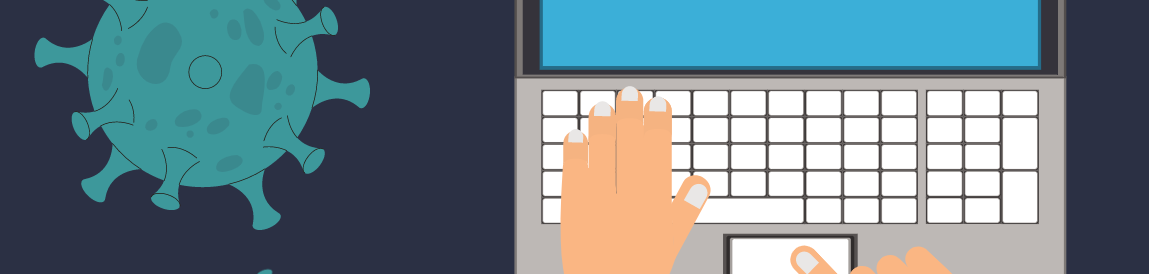![](images/cover_fig.png)

In [120]:
# @title
display(Markdown(f"# <font color= '#435420'> RELATÓRIO DE QUALIDADE DO SEQUENCIAMENTO COVIDSeq - Lote {lote}</font>"))

# <font color= '#435420'> RELATÓRIO DE QUALIDADE DO SEQUENCIAMENTO COVIDSeq - Lote 170</font>

In [85]:
# @title
display(Markdown(f"### Equipe de Biologia Molecular e Bioinformática da Rede de Vigilância Genômica do Ceará - {date.today().strftime('%d/%m/%Y')}"))

### Equipe de Biologia Molecular e Bioinformática da Rede de Vigilância Genômica do Ceará - 02/10/2023

---
### Sumário

1. [Introdução](#Introdução)

2. [Controle negativo](#Controle-negativo)

3. [Resultados do sequenciamento](#Resultados-do-sequenciamento)

4. [Variantes do SARS-CoV-2 identificadas](#Variantes-do-SARS-CoV-2-identificadas)

5. [Linhagens minoritárias](#Linhagens-minoritárias)

---
# Introdução

In [44]:
# @title
with open(corrida, 'r') as file:
  temp_list = file.readlines()
  dic_corrida = {linha.split('\t')[0]: round(float(linha.split('\t')[1].strip("\n")),2) for linha in temp_list}

d = [
    ['ReadsPfTotal', dic_corrida["ReadsPfTotal"]],
    ['ReadsTotal', dic_corrida["ReadsTotal"]]
]
df_corrida = pd.DataFrame(data=d, columns=['Total de reads', 'Tipo de reads'])

In [26]:
# @title
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = dic_corrida["PercentGtQ30"],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "PercentGtQ30"},
    gauge = {'axis': {'range': [None, 100]}}))

fig.show()
# Solid_Gauge.add('PercentGtQ30', [{'value': , 'max_value': 100}])
# Solid_Gauge.add('PercentGtQ30R1', [{'value': dic_corrida["PercentGtQ30R1"], 'max_value': 100}])
# Solid_Gauge.add('PercentGtQ30R2', [{'value': dic_corrida["PercentGtQ30R2"], 'max_value': 100}])

In [27]:
# @title
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = dic_corrida["PercentGtQ30R1"],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "PercentGtQ30R1"},
    gauge = {'axis': {'range': [None, 100]}}))

fig.show()

In [28]:
# @title
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = dic_corrida["PercentGtQ30R2"],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "PercentGtQ30R2"},
    gauge = {'axis': {'range': [None, 100]}}))

fig.show()

In [46]:
# @title
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(df_corrida, x='Tipo de reads', y='Total de reads', title="Reads gerados")
fig.show()

In [47]:
# @title
df = pd.read_csv(planilha, sep="\t")


In [10]:
# @title

controles = df.loc[df["codigo-interno"].str.contains("NTC", case=False)]

tabela_sem_controles = df.drop(list(controles.index))

# funcoes.textIntroducao(tabela_sem_controles, lote, tabela_sem_controles)
# textIntroducao(tabela_sem_controles, lote, tabela_sem_controles)


[(Voltar para o sumário)](#Sumário)
***
# Controle negativo

In [13]:
# @title
controles = controles[["cobertura_5x_linux", "profundidade_linux", "qc_overallStatus_linux","linhagem_linux"]]

# df_controle = funcoes.analise_controles(controles)
df_controle = analise_controles(controles)


,cobertura_5x_linux,profundidade_linux,qc_overallStatus_linux,linhagem_linux
287,99.812700,2280,good,BA.1.1
383,0.548400,0,bad,nan


**<span style="color: red"> Um ou mais controles negativos nao apresentaram parametros satisfatorios acima dos padroes para as amostras).</span>**

[(Voltar para o sumário)](#Sumário)
***
# Resultados do sequenciamento

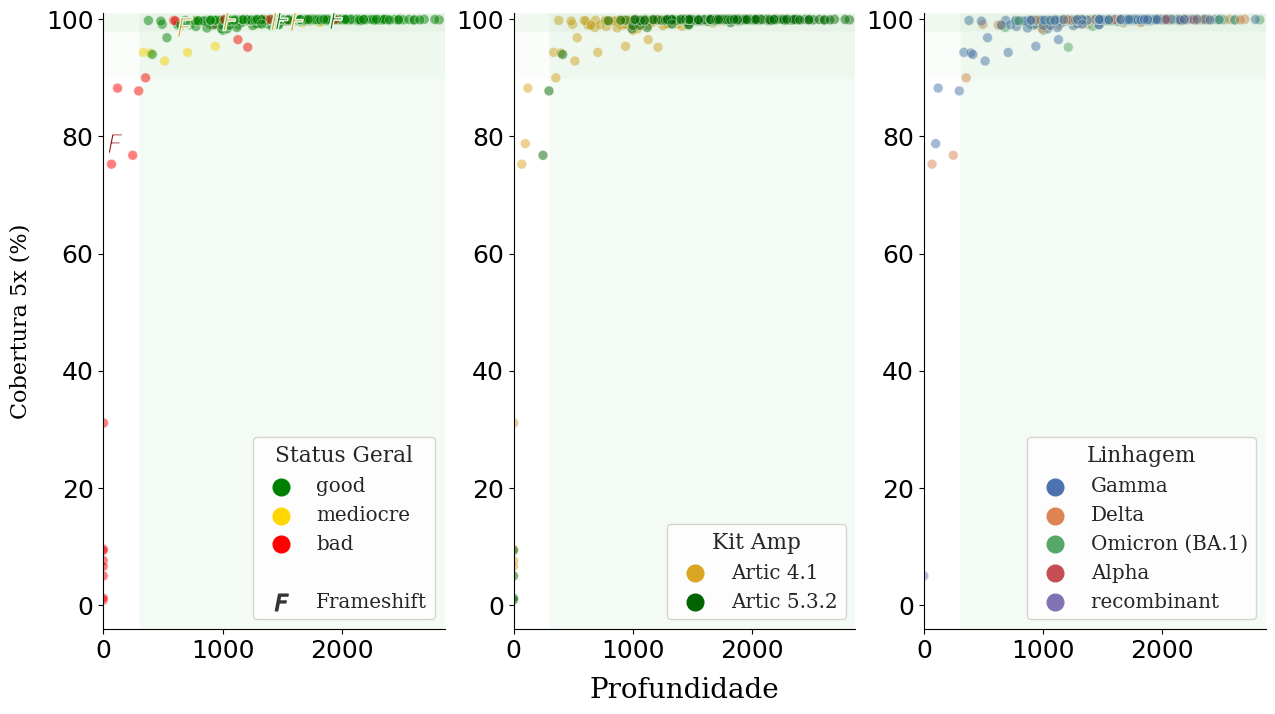

**<span style="color:red">36 amostras foram classificadas como FALHA por apresentar cobertura < 90%, profundidade < 100X e/ou status "bad".</span>**

In [14]:
# @title
# funcoes.grafico_qual_trio(tabela_sem_controles)
grafico_qual_trio(tabela_sem_controles)

# falhas = funcoes.informa_falhas(tabela_sem_controles)
falhas = informa_falhas(tabela_sem_controles)



tabelaBons = tabela_sem_controles.loc[(tabela_sem_controles["cobertura_5x_linux"] >= 90) & (
    tabela_sem_controles["profundidade_linux"] >= 100) & (tabela_sem_controles["qc_overallStatus_linux"] != "bad")]

# funcoes.informa_frameshifts(tabelaBons)

### As sequintes amostras foram consideradas falhas:

In [15]:
# @title
# if len(falhas) > 0:
#     display(falhas.style.applymap(funcoes.style_cobertura, "Cobertura (5x)").applymap(
#     funcoes.style_profundidade, "Profundidade").applymap(funcoes.style_status, "Status Geral"))
# else:
#     print('Nenhuma amostra apresentou falha.')

falhas = falhas[["cobertura_5x_linux", "profundidade_linux", "qc_overallStatus_linux","linhagem_linux"]]


if len(falhas) > 0:
    display(falhas.style.applymap(style_cobertura, "cobertura_5x_linux").applymap(
    style_profundidade, "profundidade_linux").applymap(style_status, "qc_overallStatus_linux"))
else:
    print('Nenhuma amostra apresentou falha.')

,cobertura_5x_linux,profundidade_linux,qc_overallStatus_linux,linhagem_linux
0,99.836100,1582,bad,P.1
2,99.735800,1655,bad,BA.1
82,75.260000,69,bad,AY.99.2
83,78.768000,99,bad,P.1
84,89.997700,355,bad,AY.99.2
87,99.187400,941,bad,BA.1
88,31.073800,3,bad,nan
94,9.574300,0,bad,B
95,95.221200,1211,bad,BA.1.1
116,99.786000,592,bad,B.1.1.28


[(Voltar para o sumário)](#Sumário)
***
# Variantes do SARS-CoV-2 identificadas

In [16]:
# @title
#funcoes.grafico_linhagens(tabelaBons)

linhagens = tabelaBons.groupby(['linhagem_linux', 'variante_pango_linux']).size()
linhagens = pd.DataFrame({"linhagem_linux": [t[0] for t in linhagens.index],\
                          "variante_pango_linux": [t[1] for t in linhagens.index],\
                          "Num. de amostras": linhagens.values})
linhagens = linhagens.sort_values(["variante_pango_linux", "linhagem_linux"])
VOCs = linhagens.groupby(["variante_pango_linux"]).sum()



In [20]:
# @title
# funcoes.circle_plot(linhagens, VOCs)

# funcoes.pivot_linhagens(linhagens)

import plotly.express as px


fig = px.sunburst(linhagens, path=['variante_pango_linux', 'linhagem_linux'], values='Num. de amostras')
fig.show()
# fig.write_image("fig1.svg")
pivot_linhagens(linhagens)

Num. de amostras
variante_pango_linux linhagem_linux                  
Alpha                B.1.1.7                       16
Delta                AY.47                          2
                     AY.6                           2
                     AY.99.2                       87
Gamma                P.1                          165
                     P.1.14                        10
                     P.1.7                          4
Omicron (BA.1)       BA.1                          18
                     BA.1.1                        28
                     BA.1.1.1                       2
                     BA.1.14                        4
                     BA.1.14.1                      2
                     BA.1.14.2                      4

[(Voltar para o sumário)](#Sumário)
***
# Linhagens minoritárias

In [18]:
# @title
# funcoes.linhagens_minor(tabelaBons)

tabelaBons = tabelaBons[["cobertura_5x_linux", "profundidade_linux", "qc_overallStatus_linux","linhagem_linux", "numero_minor","linhagem_minor_linux"]]

linhagens_minor(tabelaBons)

As seguintes amostras apresentaram linhagem minoritaria:


,cobertura_5x_linux,profundidade_linux,qc_overallStatus_linux,linhagem_linux,numero_minor,linhagem_minor_linux
1,99.769300,1534,good,AY.99.2,143,BA.1
11,99.796000,1515,good,AY.99.2,10,AY.99
14,99.809400,1382,good,AY.99.2,13,AY.99
17,99.792700,1515,good,AY.99.2,9,AY.99
25,99.806000,1421,good,AY.6,9,B.1.617.2
31,99.836100,1322,good,BA.1.1,138,AY.99.2
33,99.906400,1695,good,AY.99.2,10,AY.99
34,99.749200,1801,good,BA.1.1,15,BA.1
36,99.812700,1269,good,AY.99.2,9,AY.99
39,99.769300,1465,mediocre,AY.99.2,130,BA.1.1


[(Voltar para o sumário)](#Sumário)

In [ ]:
# @title
%%shell
jupyter nbconvert --to html "/content/relatorioQualidade.ipynb"